In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
training_set_features: pd.DataFrame = pd.read_csv(
    "../Flu Shot Learning Predict H1N1 and Seasonal Flu Vaccines/training_set_features.csv",
    sep=",",
)

test_set_features: pd.DataFrame = pd.read_csv(
    "../Flu Shot Learning Predict H1N1 and Seasonal Flu Vaccines/test_set_features.csv",
    sep=",",
)

def show(data: pd.DataFrame):
    for column in data.columns:
        if column == "respondent_id":
            continue
        print(data[column].value_counts())

show(training_set_features)
show(test_set_features)

2.0    10575
1.0     8153
3.0     4591
0.0     3296
Name: h1n1_concern, dtype: int64
1.0    14598
2.0     9487
0.0     2506
Name: h1n1_knowledge, dtype: int64
0.0    25335
1.0     1301
Name: behavioral_antiviral_meds, dtype: int64
1.0    19228
0.0     7271
Name: behavioral_avoidance, dtype: int64
0.0    24847
1.0     1841
Name: behavioral_face_mask, dtype: int64
1.0    22015
0.0     4650
Name: behavioral_wash_hands, dtype: int64
0.0    17073
1.0     9547
Name: behavioral_large_gatherings, dtype: int64
0.0    17644
1.0     8981
Name: behavioral_outside_home, dtype: int64
1.0    18001
0.0     8578
Name: behavioral_touch_face, dtype: int64
0.0    19139
1.0     5408
Name: doctor_recc_h1n1, dtype: int64
0.0    16453
1.0     8094
Name: doctor_recc_seasonal, dtype: int64
0.0    18446
1.0     7290
Name: chronic_med_condition, dtype: int64
0.0    23749
1.0     2138
Name: child_under_6_months, dtype: int64
0.0    23004
1.0     2899
Name: health_worker, dtype: int64
1.0    12697
0.0     1736
Name

#### 处理缺失值

In [3]:
def fillna(features: pd.DataFrame):
    def fill_marital_status(x):
        if pd.notnull(x["marital_status"]):
            return x["marital_status"]
        else:
            ms = (
                "Married"
                if x["age_group"] == "65+ Years"
                or x["age_group"] == "55 - 64 Years"
                or x["age_group"] == "45 - 54 Years"
                else "Not Married"
            )
            return ms

    features["marital_status"] = features.apply(
        lambda x: fill_marital_status(x), axis=1
    )

    # nil is meaningful to these features
    features["employment_industry"].fillna("nil", inplace=True)
    features["employment_occupation"].fillna("nil", inplace=True)
    features["rent_or_own"].fillna("nil", inplace=True)
    features["employment_status"].fillna("Unemployed", inplace=True)
    features["education"].fillna("nil", inplace=True)
    features["household_children"].fillna(0, inplace=True)
    features["household_adults"].fillna(0, inplace=True)
    features["health_insurance"].fillna("nil", inplace=True)

    # features.dropna(axis=0, thresh=features.shape[1] * 5 // 6, inplace=True)

    features.fillna(method="bfill", inplace=True)
    features.fillna(method="ffill", inplace=True)

fillna(training_set_features)
fillna(test_set_features)

In [4]:
missing_values_count = training_set_features.isnull().sum()

# show which columns still have missing values
missing_values_count.sort_values(ascending=False).head(30), training_set_features.shape

(respondent_id                  0
 h1n1_concern                   0
 opinion_seas_risk              0
 opinion_seas_sick_from_vacc    0
 age_group                      0
 education                      0
 race                           0
 sex                            0
 income_poverty                 0
 marital_status                 0
 rent_or_own                    0
 employment_status              0
 hhs_geo_region                 0
 census_msa                     0
 household_adults               0
 household_children             0
 employment_industry            0
 opinion_seas_vacc_effective    0
 opinion_h1n1_sick_from_vacc    0
 opinion_h1n1_risk              0
 behavioral_outside_home        0
 h1n1_knowledge                 0
 behavioral_antiviral_meds      0
 behavioral_avoidance           0
 behavioral_face_mask           0
 behavioral_wash_hands          0
 behavioral_large_gatherings    0
 behavioral_touch_face          0
 opinion_h1n1_vacc_effective    0
 doctor_recc_h

#### 可视化数据

h1n1_concern


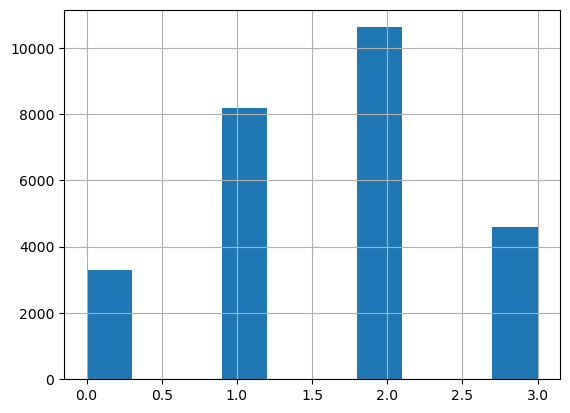

h1n1_knowledge


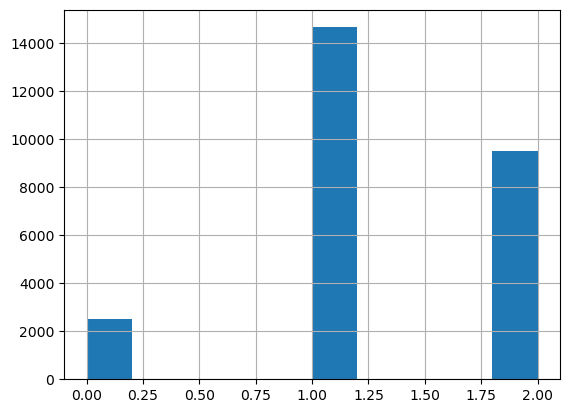

behavioral_antiviral_meds


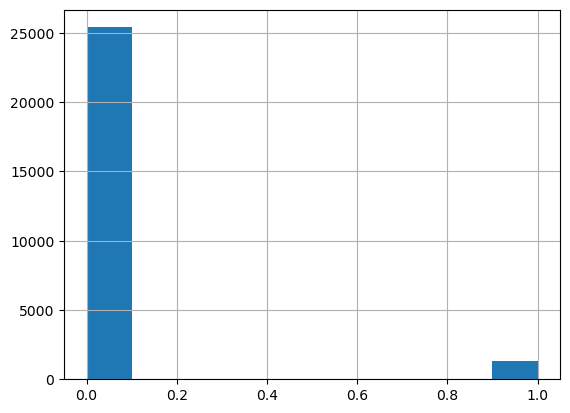

behavioral_avoidance


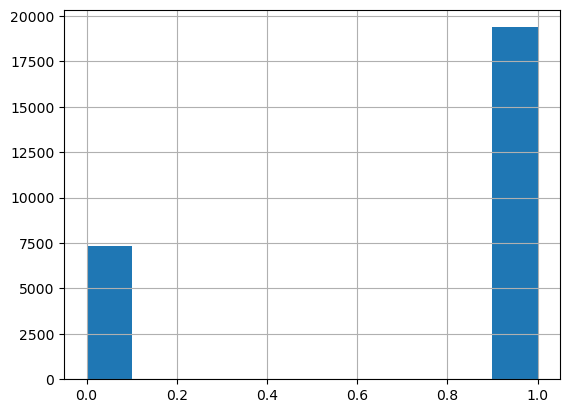

behavioral_face_mask


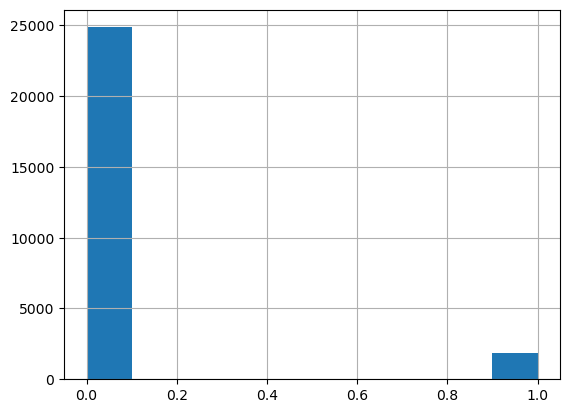

behavioral_wash_hands


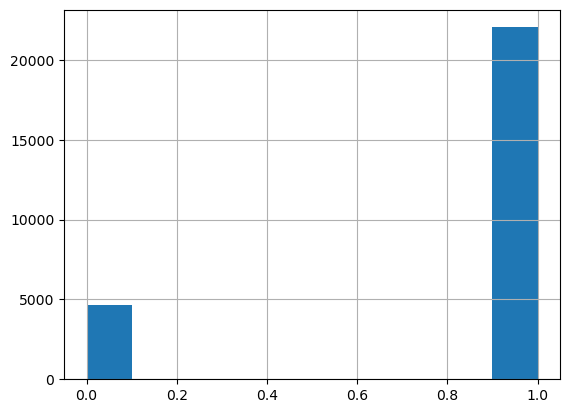

behavioral_large_gatherings


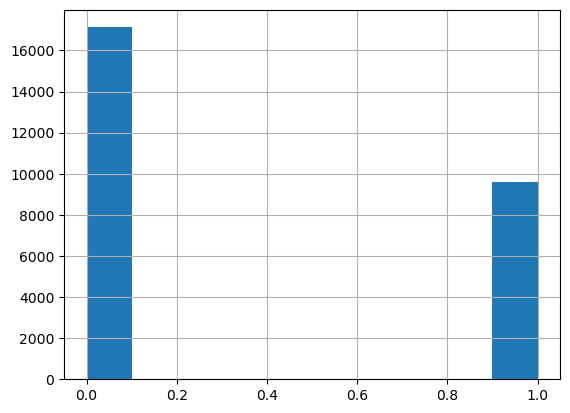

behavioral_outside_home


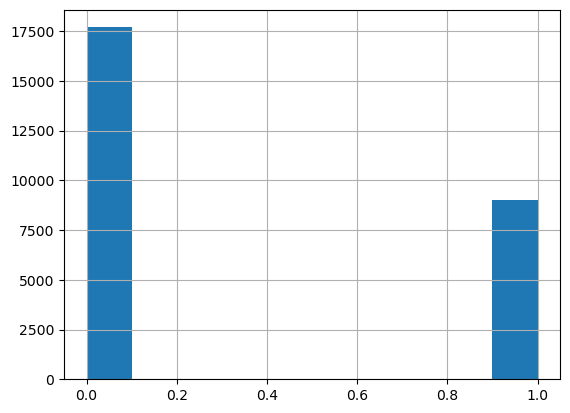

behavioral_touch_face


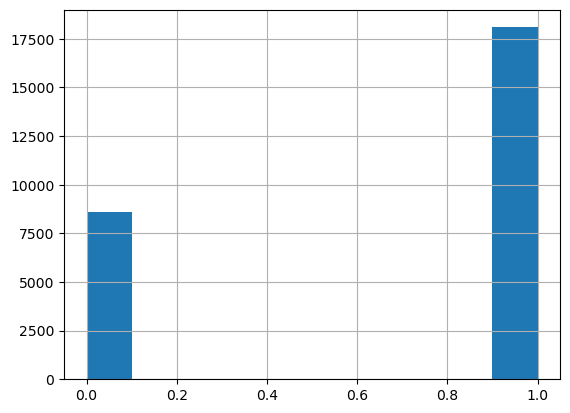

doctor_recc_h1n1


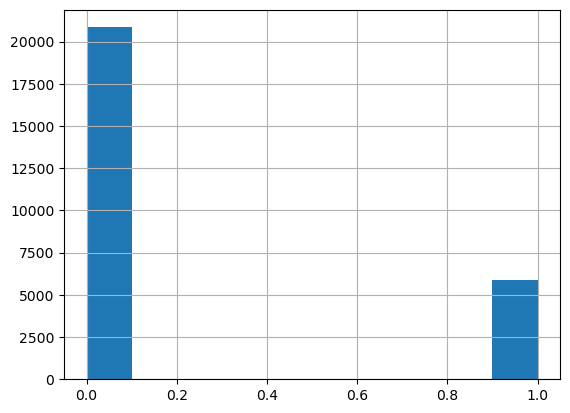

doctor_recc_seasonal


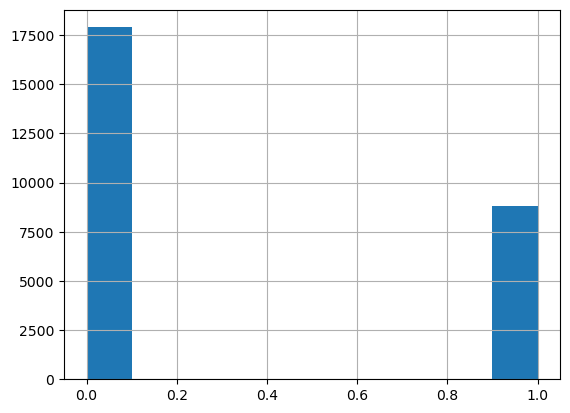

chronic_med_condition


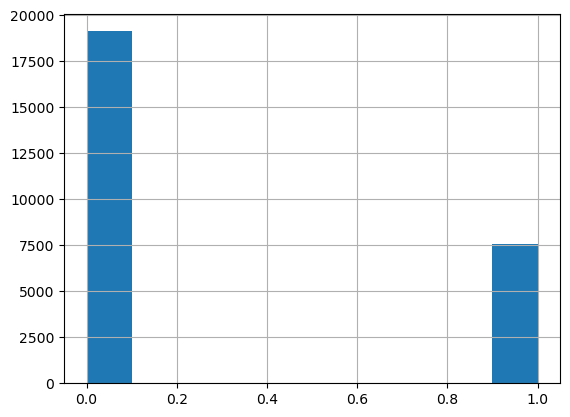

child_under_6_months


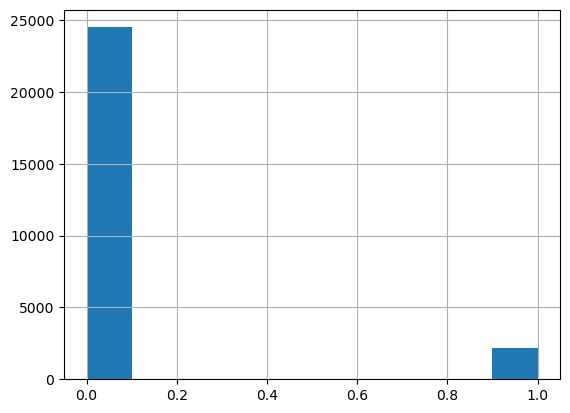

health_worker


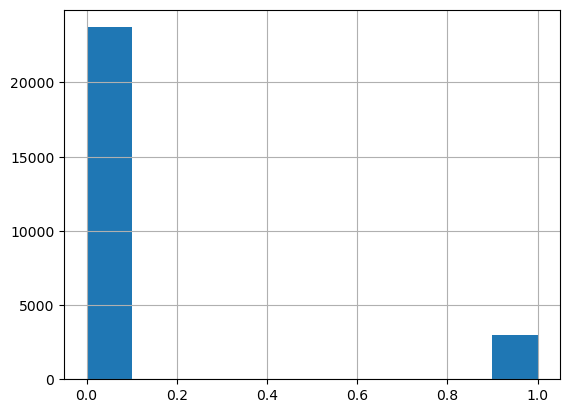

opinion_h1n1_vacc_effective


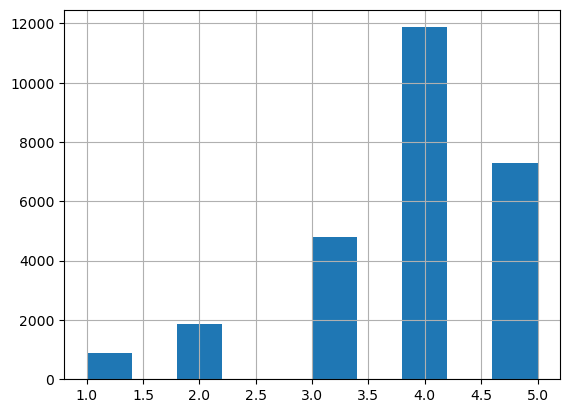

opinion_h1n1_risk


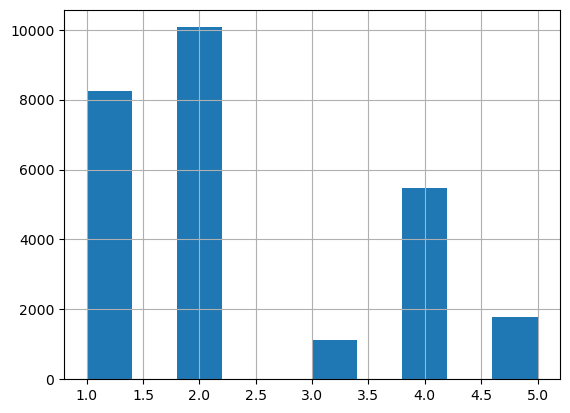

opinion_h1n1_sick_from_vacc


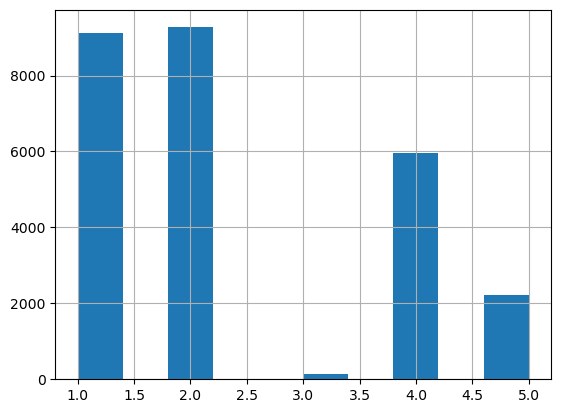

opinion_seas_vacc_effective


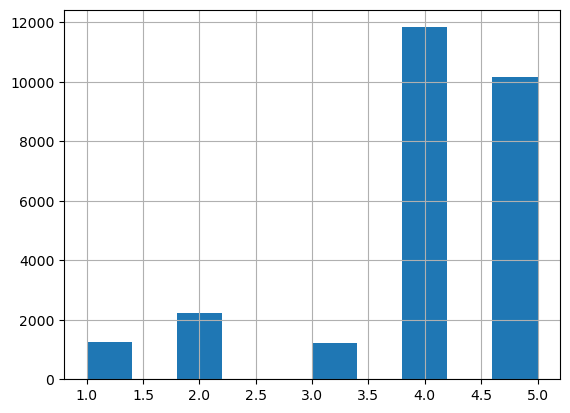

opinion_seas_risk


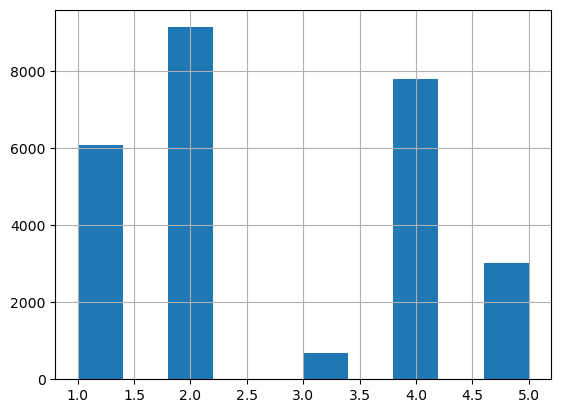

opinion_seas_sick_from_vacc


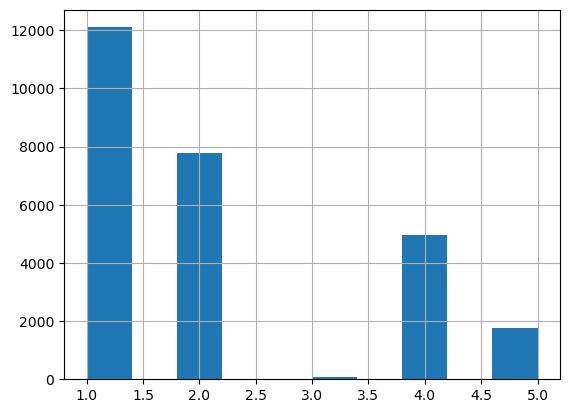

household_adults


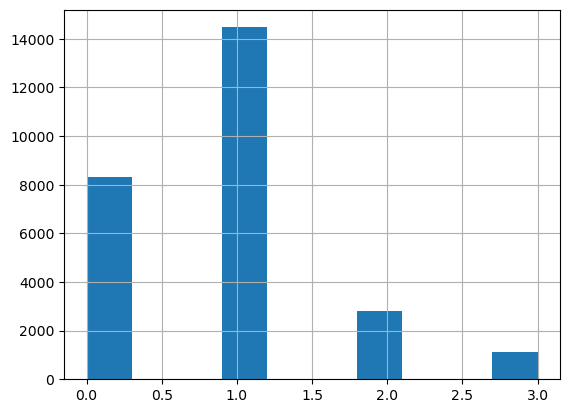

household_children


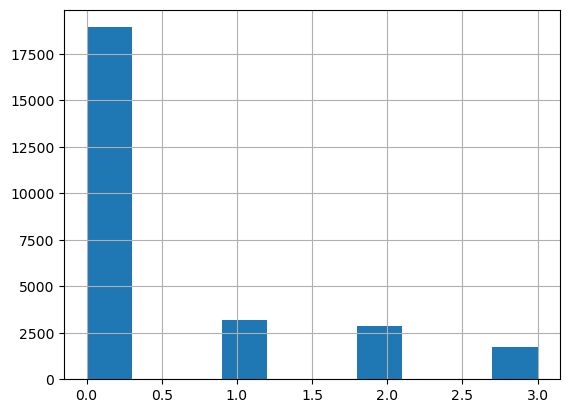

In [5]:
# show histogram of each column
for column in training_set_features.columns:
    if column == "respondent_id":
        continue
    if training_set_features[column].dtype == "float64":
        print(column)
        training_set_features[column].hist(label=column)
        plt.show()

#### 数据归一化

In [6]:
# normalize columns
def normalize(features: pd.DataFrame):
    for column in features.columns:
        if column == "respondent_id":
            continue
        if features[column].dtype == "float64":
            features[column] = (features[column] - features[column].min()) / (
                features[column].max() - features[column].min()
            )

normalize(training_set_features)
normalize(test_set_features)

#### One-Hot 编码

In [7]:
# one-hot encoding
def one_hot_encoding(features: pd.DataFrame):
    return pd.get_dummies(features)


encoded = one_hot_encoding(pd.concat([training_set_features, test_set_features]))
training_set_features = encoded[: training_set_features.shape[0]]
test_set_features = encoded[training_set_features.shape[0] :]

#### 合并 Features 和 Labels

In [8]:
labels = pd.read_csv(
    "../Flu Shot Learning Predict H1N1 and Seasonal Flu Vaccines/training_set_labels.csv",
    sep=",",
)

training_set = pd.merge(training_set_features, labels, on="respondent_id")

#### 导出数据

In [9]:
training_set.to_csv(
    "../Flu Shot Learning Predict H1N1 and Seasonal Flu Vaccines/fixed_training_set.csv",
    index=False,
)
test_set_features.to_csv(
    "../Flu Shot Learning Predict H1N1 and Seasonal Flu Vaccines/fixed_test_set.csv",
    index=False,
)

In [10]:
pd.concat([training_set.head(), test_set_features.head()])

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv,h1n1_vaccine,seasonal_vaccine
0,0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0.0,0.0
1,1,1.000000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,0,0,0,1,0,0,0,0.0,1.0
2,2,0.333333,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0.0,0.0
3,3,0.333333,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.0,1.0
4,4,0.666667,0.5,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0.0,0.0
0,26707,0.666667,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,26708,0.333333,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,NaN,NaN
2,26709,0.666667,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,26710,0.333333,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,26711,1.000000,0.5,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,NaN,NaN
